# Zeeman beat calculation testing notebook

For estimating Zeeman beat systematics on lifetime measurement. 

## Notes:

- Four level configuration calculation.
- the unit of time, $\Gamma$ is the lifetime of $^3D_1$ state

In [7]:
# Find and go to the project directory
using DrWatson
@quickactivate "DecayDynamics"
projectname()
cd(projectdir())
pwd()

"/Users/kyngt/Documents/GitHub/DecayDynamics"

In [8]:
# Loading codes
include(srcdir("single_atom_four_level.jl"))
include(srcdir("Base.jl"))
# Add packages
Plots.default(fontfamily="Helvetica")

# B field strength check
Check the field strength without any decays. 

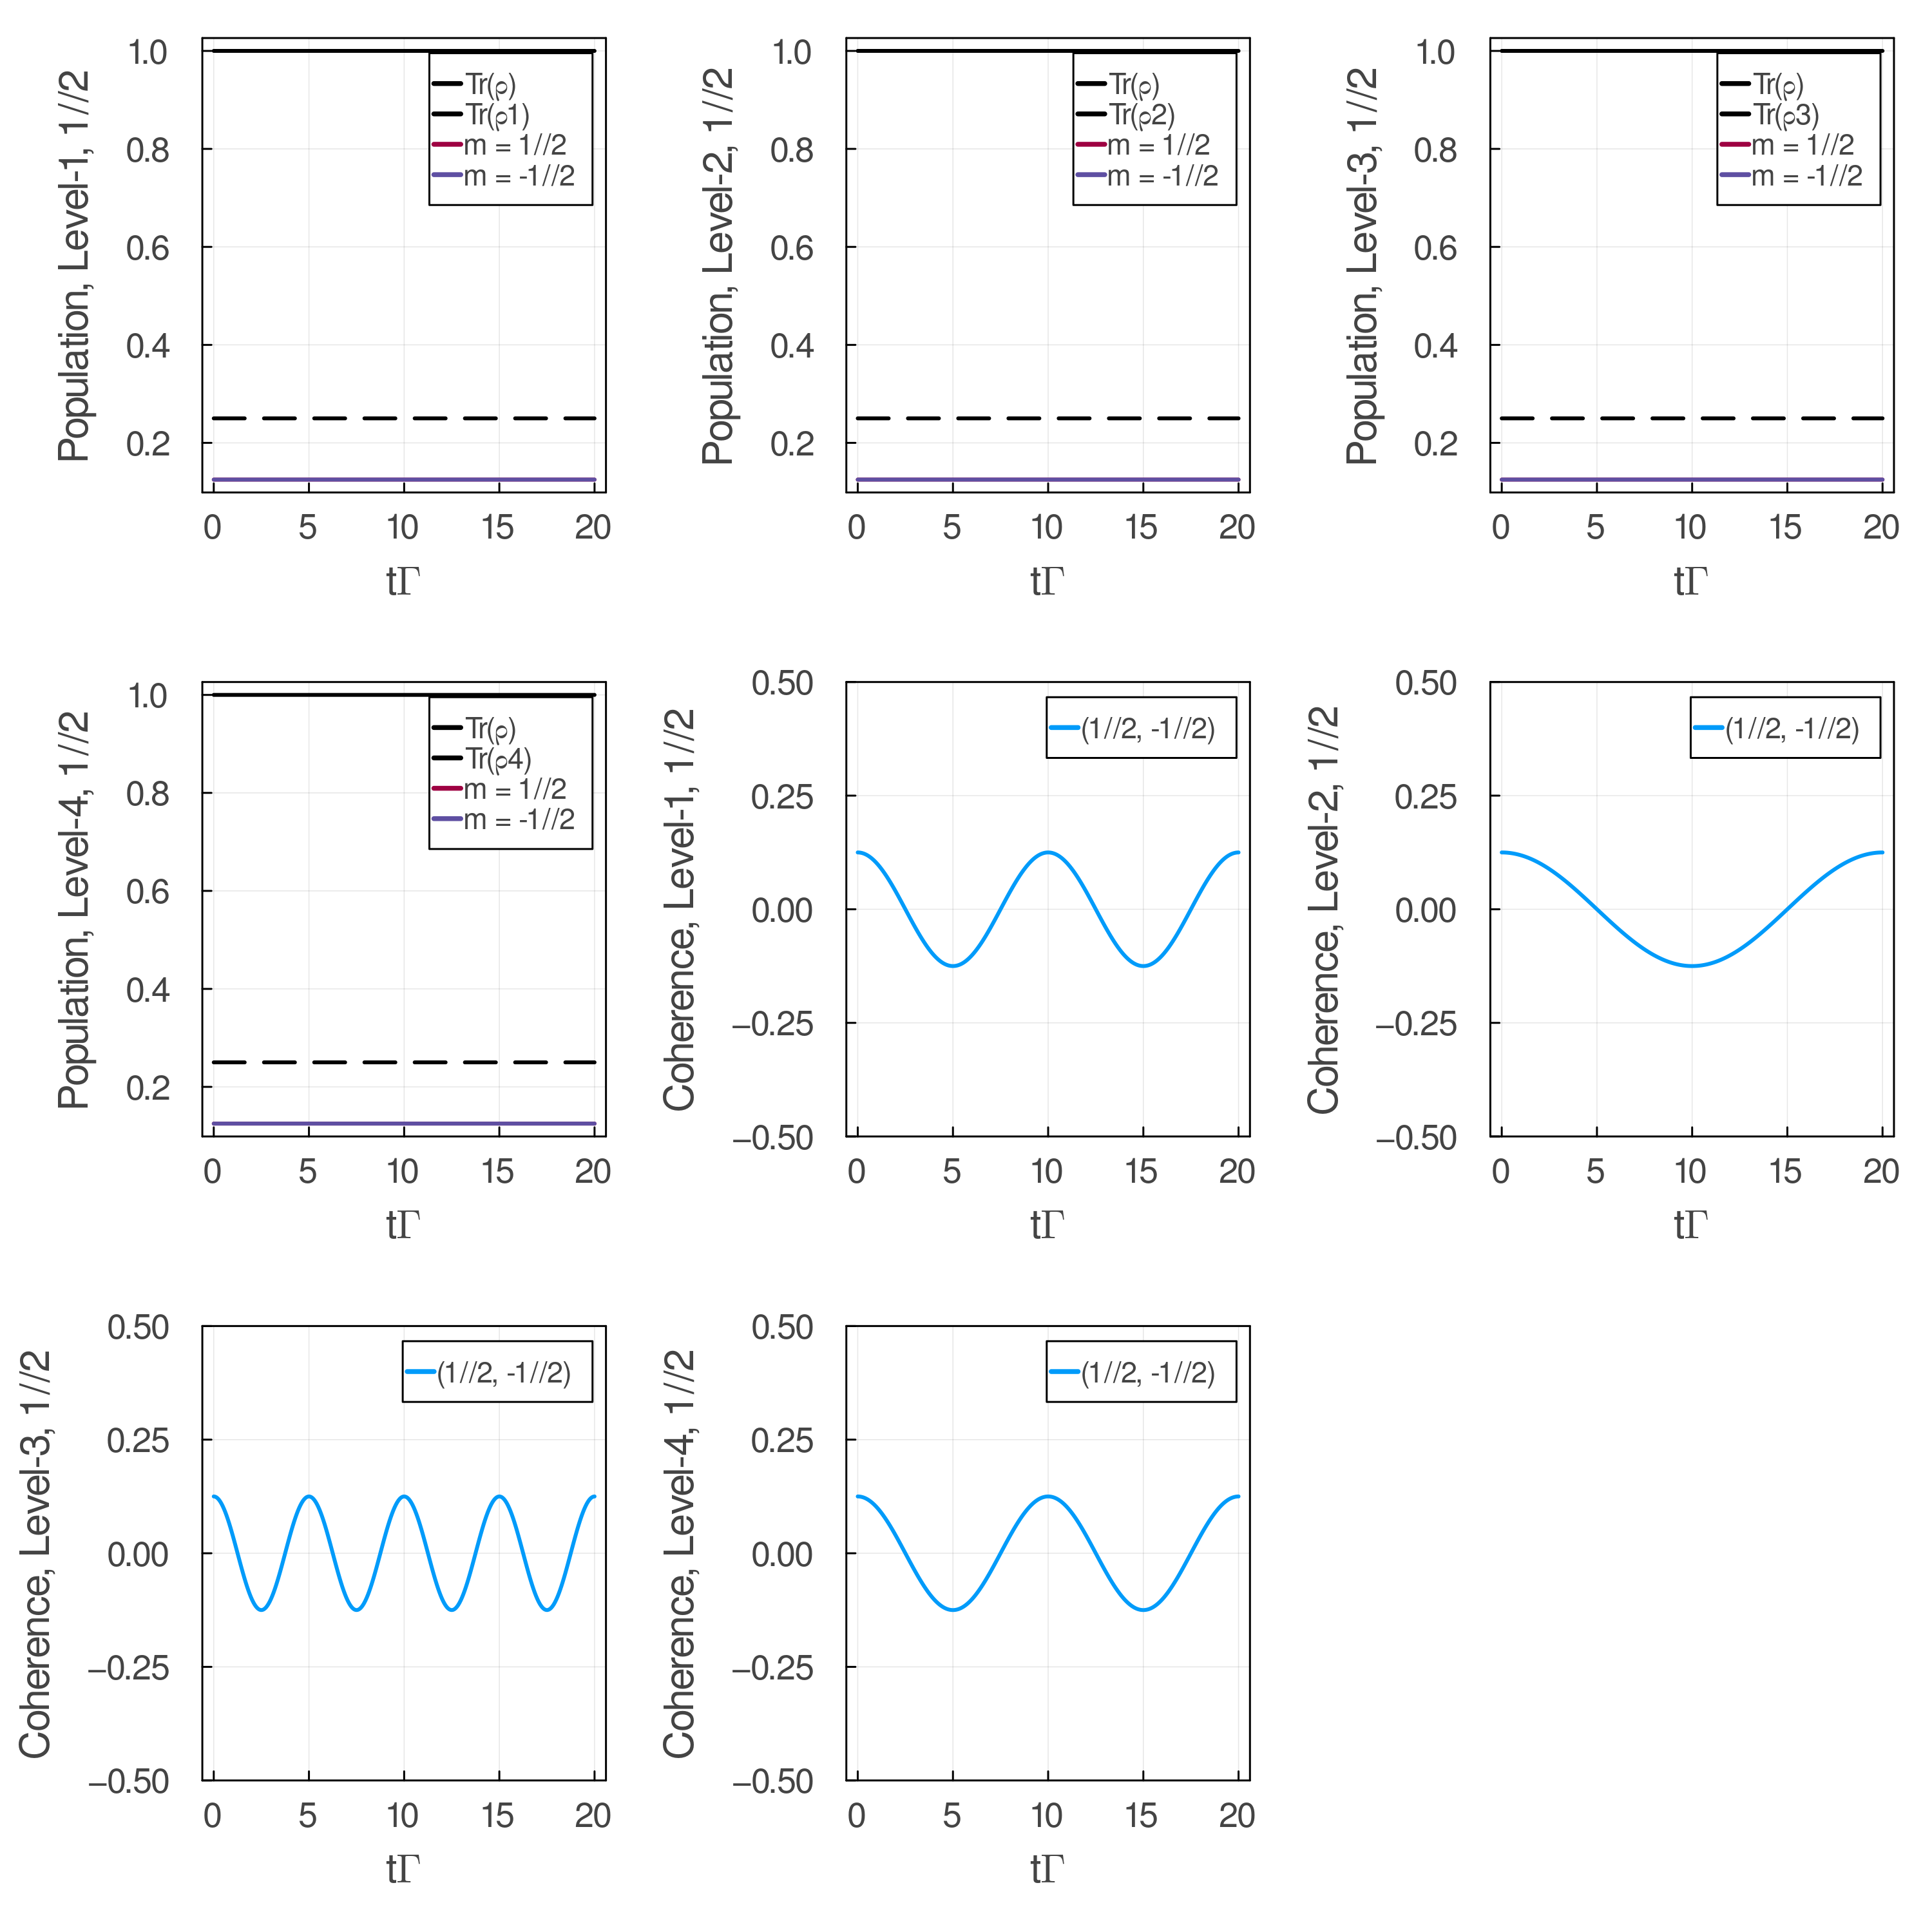

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /Users/kyngt/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /Users/kyngt/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


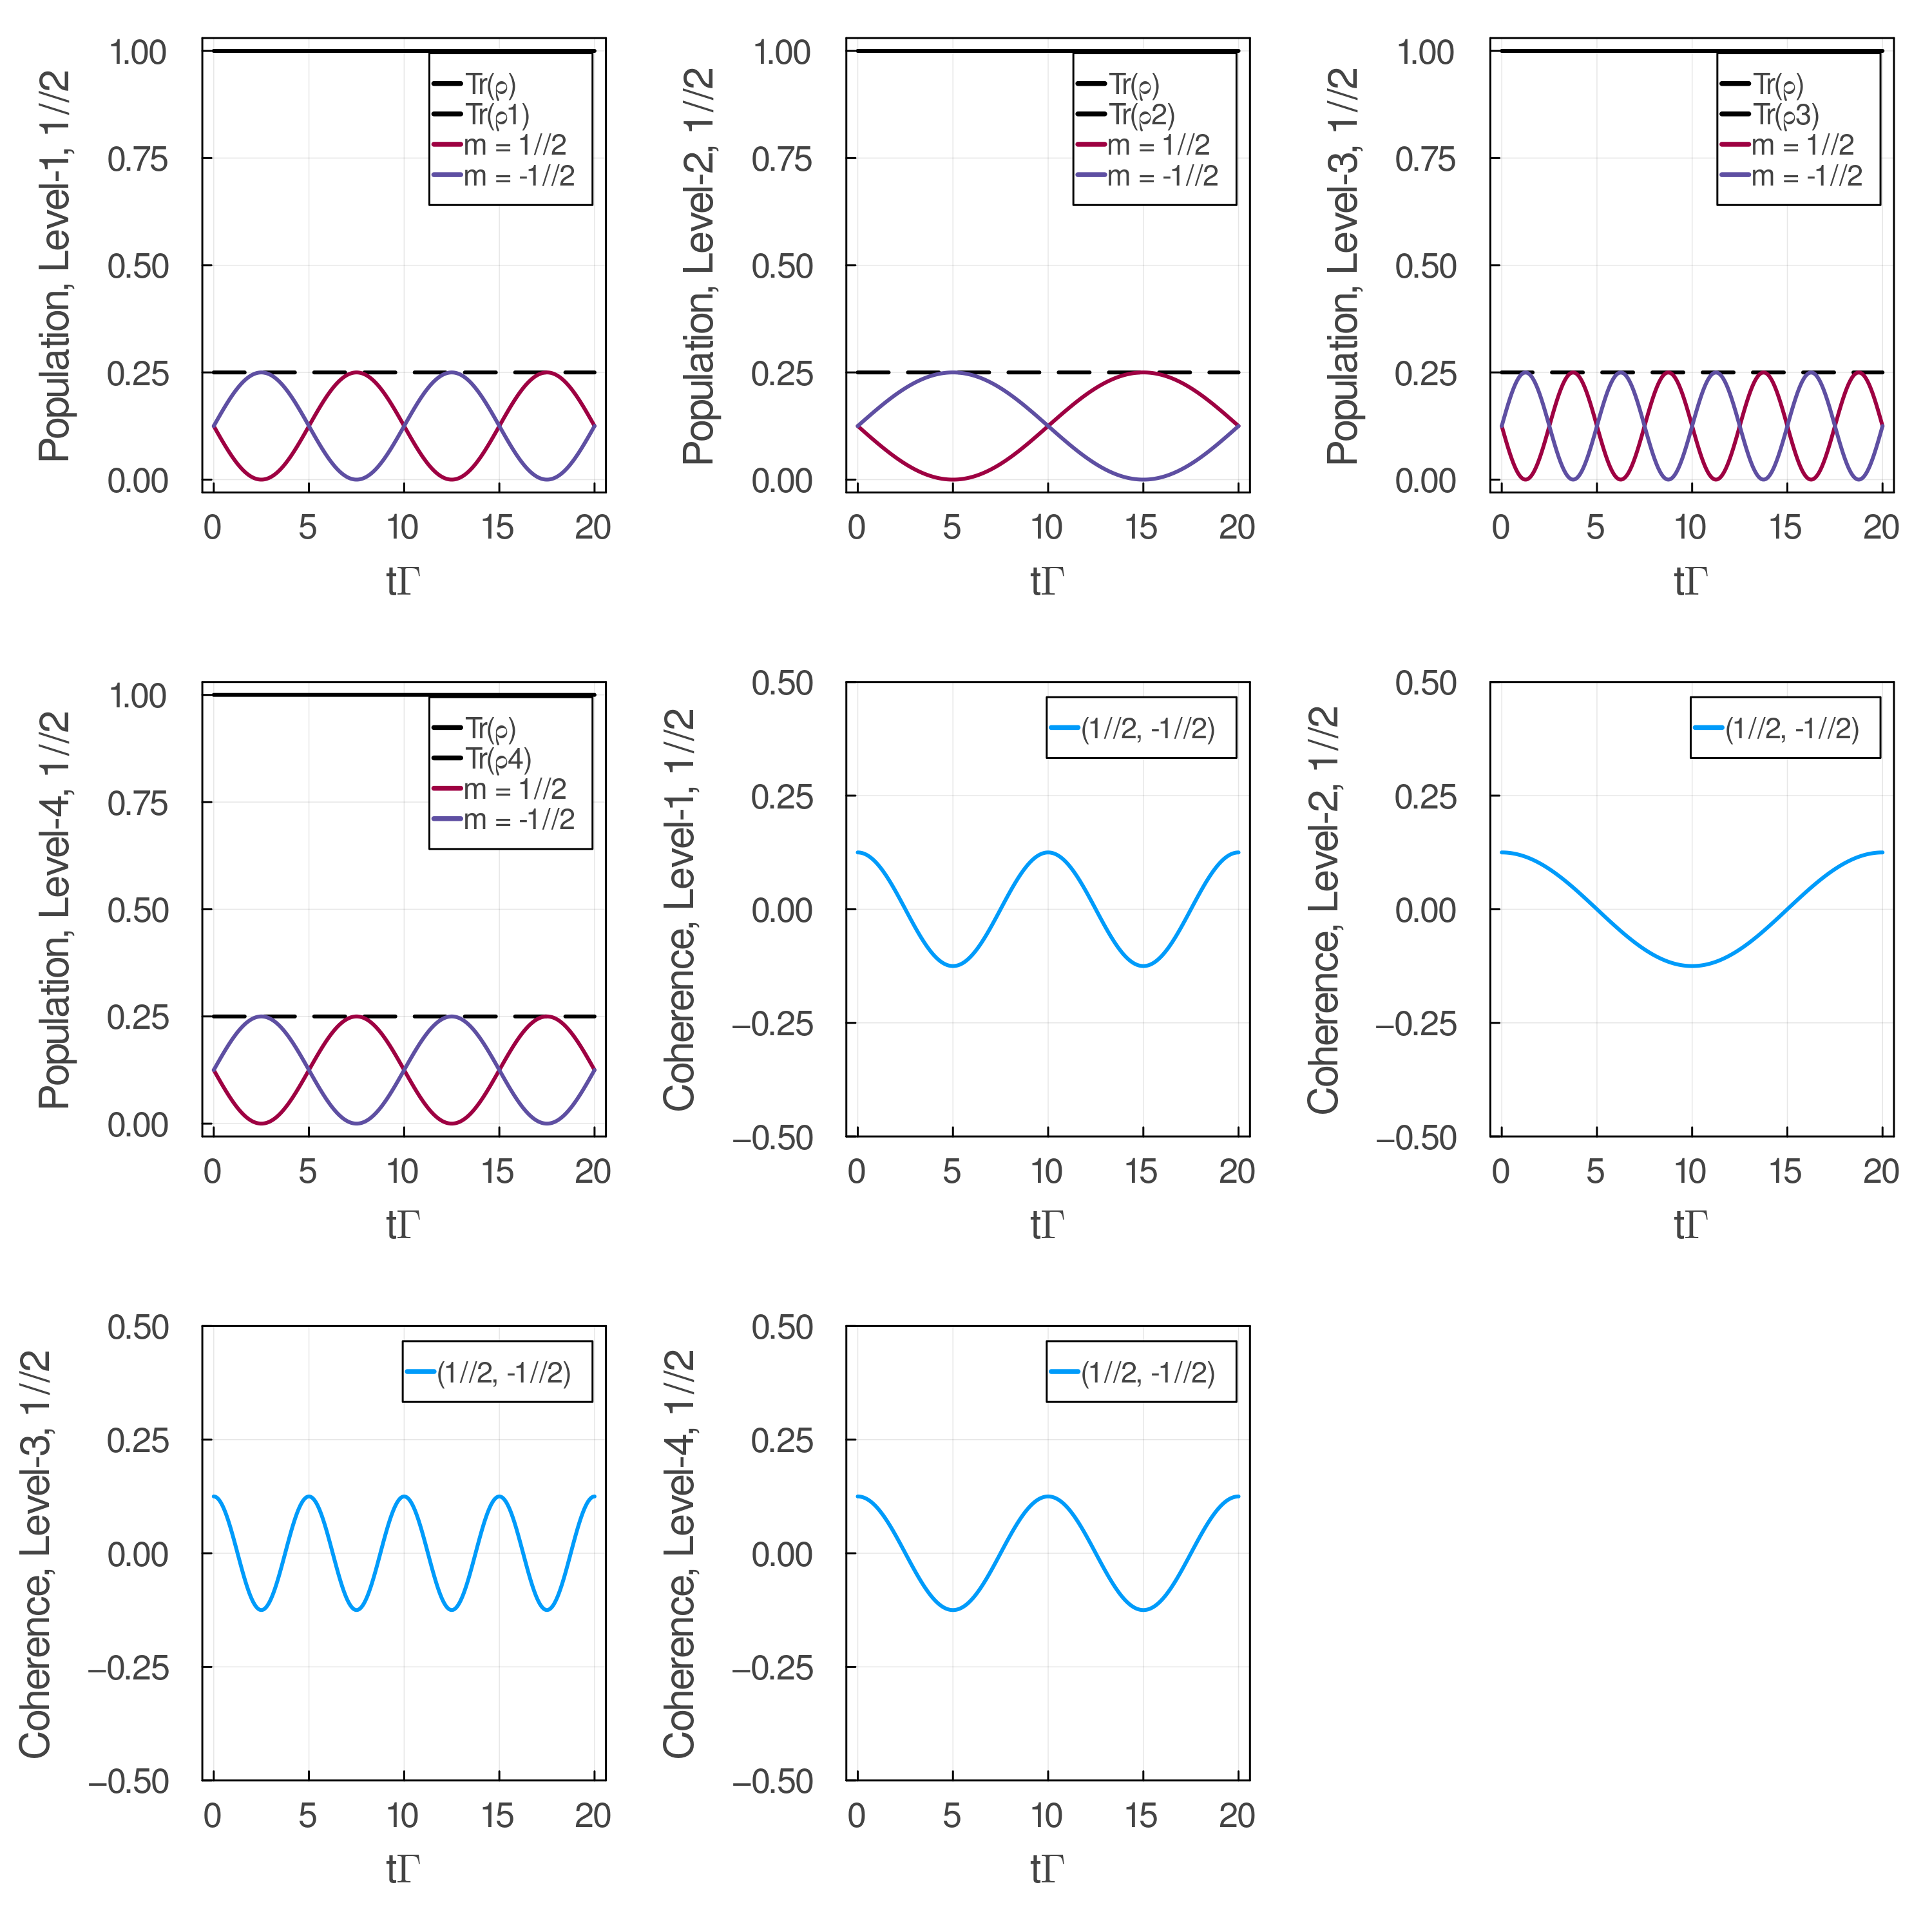

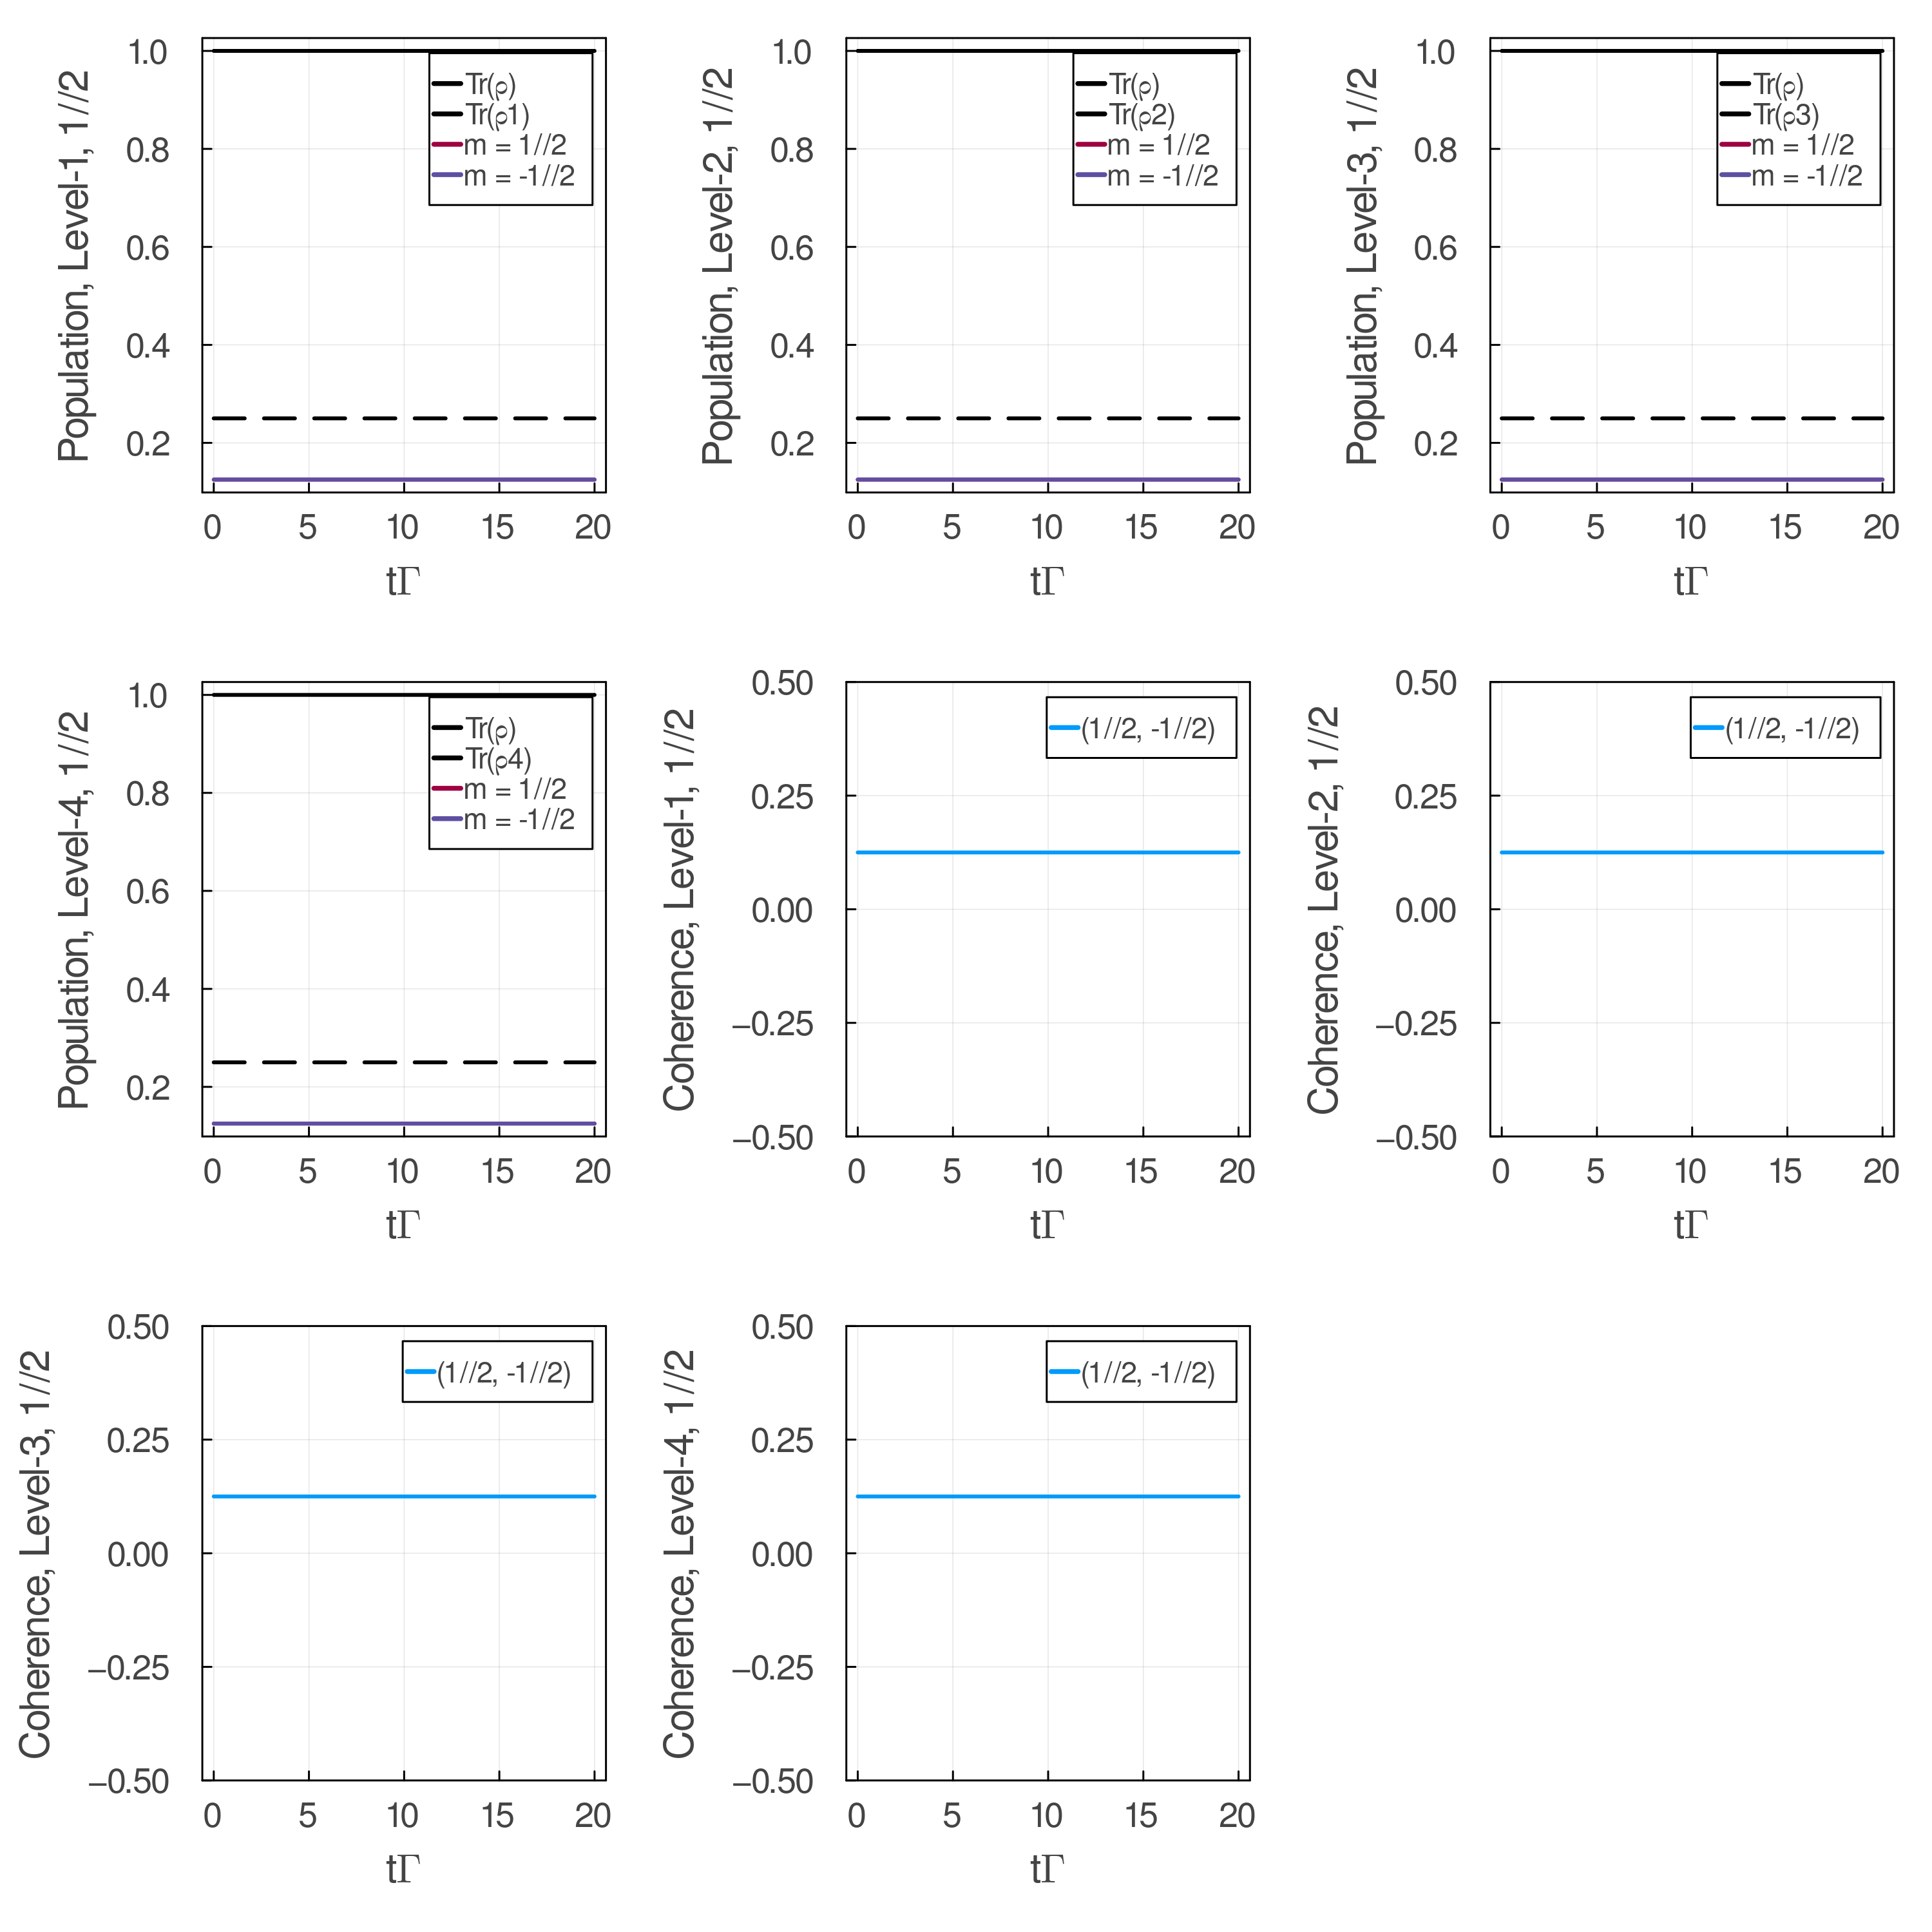

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /Users/kyngt/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


In [18]:
function check_Lamor_precession(Bfield)
	# Parameters for the simulation
	F_i = [1//2, 1//2, 1//2, 1//2] # two intermediate states, 3D1, 3P1, 3P0, 1S0
	g_i = [1, 0.5, 2, 1]
	Γ_kl = sparse(
	        [1, 1, 2],
	        [2, 3, 4],
	        [1*0.385, 1*0.597, 0.1], # Branching ratio, 3P1 assumed to be just 10 times slower. 
	        4, 4
	) * 0
	frac = 1
	tspan = range(0, 20, length=300)
	ρ_0 = normalize(directsum(
	    (Fm_state(F_i[1], 1//2) + Fm_state(F_i[1], -1//2)) ,
	    (Fm_state(F_i[1], 1//2) + Fm_state(F_i[1], -1//2)),
	    (Fm_state(F_i[1], 1//2) + Fm_state(F_i[1], -1//2)),
	    (Fm_state(F_i[1], 1//2) + Fm_state(F_i[1], -1//2))
	))

	# Pack the parameters
	parameters = @dict F_i g_i Bfield Γ_kl ρ_0 tspan

	# Solve the master equation
	result = evolve_master(parameters)
	figs_population = plot_dynamics(result)
	return plot(figs_population..., size=(1000, 1000), layout=(3, 3), margins=3Plots.mm)
end

display(check_Lamor_precession([0, 0, 0.1]))
display(check_Lamor_precession([0, 0.1, 0]))
display(check_Lamor_precession([0.1, 0, 0]))

# Precessions
First check the g-factors:

D state: (1/11, 2/99, -1/9) for F = (11/2, 9/2, 7/2) 

P state: (3/11, 2/33, -1/3) for F = (11/2, 9/2, 7/2) 

The hyperfine splitting for P state is large enough to make the photon distinguishible. Therefore, we neglect the quantum interference effect for that. 

4-level calculation may provide upper bound of the systematics

What would be the realistic 3D1 state? Experimental details: 

<img src="../plots/3d1_exp.png" width=500 />

CG coefficients:

<img src="../plots/cg.jpg" width=500 />

From this, we guess that equal superposition of -9/2, -7/2 would give us the strongest beat. 


In [ ]:
# population decay and radiation pattern calculation
# compare with zero field or double exponential cases
# save data and fitting with python